In [60]:
 #installing the laggle library

 !pip install kaggle

In [61]:
#configuring path of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Dog vs Cat Dataset from Kaggle

In [62]:
#Kaggle api

!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [63]:
!ls

 dogs-vs-cats.zip   kaggle.json   sampleSubmission.csv	 train
'image resized'     sample_data   test1.zip		 train.zip


In [64]:
#Extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Dataset is Extracted")

The Dataset is Extracted


In [65]:
#Extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Dataset is Extracted")

The Dataset is Extracted


In [66]:
import os

#counting the number of files in train folder

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  25000


Printing the name of the images

In [67]:
file_name = os.listdir('/content/train')
print(file_name)

['dog.5348.jpg', 'cat.5225.jpg', 'cat.11179.jpg', 'dog.5625.jpg', 'cat.7098.jpg', 'dog.4405.jpg', 'cat.4337.jpg', 'cat.9866.jpg', 'dog.8400.jpg', 'dog.9372.jpg', 'dog.1308.jpg', 'cat.11405.jpg', 'cat.11126.jpg', 'dog.1467.jpg', 'cat.11245.jpg', 'cat.4331.jpg', 'cat.10062.jpg', 'cat.10758.jpg', 'dog.2584.jpg', 'dog.7480.jpg', 'dog.3159.jpg', 'cat.9306.jpg', 'cat.10831.jpg', 'dog.8073.jpg', 'dog.7575.jpg', 'dog.7977.jpg', 'dog.11802.jpg', 'dog.10834.jpg', 'cat.1347.jpg', 'cat.1826.jpg', 'dog.8083.jpg', 'cat.11830.jpg', 'cat.8766.jpg', 'dog.11385.jpg', 'dog.11986.jpg', 'dog.223.jpg', 'cat.6822.jpg', 'dog.8391.jpg', 'dog.4697.jpg', 'cat.2477.jpg', 'cat.11376.jpg', 'dog.4197.jpg', 'dog.503.jpg', 'cat.3197.jpg', 'dog.11223.jpg', 'cat.2436.jpg', 'dog.7020.jpg', 'dog.1311.jpg', 'dog.7525.jpg', 'cat.7713.jpg', 'dog.1556.jpg', 'dog.6641.jpg', 'dog.10382.jpg', 'dog.1740.jpg', 'cat.12175.jpg', 'cat.12306.jpg', 'dog.7847.jpg', 'cat.9303.jpg', 'cat.8520.jpg', 'cat.7074.jpg', 'dog.983.jpg', 'dog.1211

Importing Libraries

In [68]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of Dogs and Cats


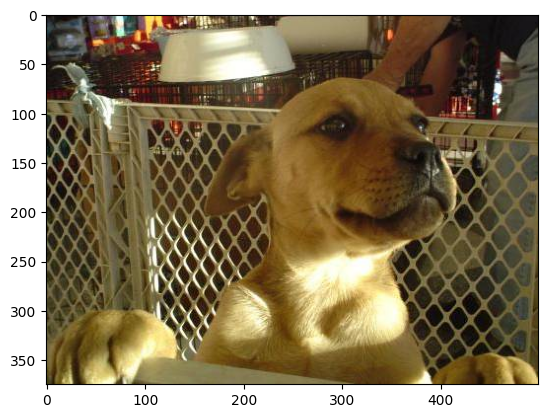

In [69]:
#DIsplay Dog Image

img = mpimg.imread('/content/train/dog.4405.jpg')
imgplot = plt.imshow(img)
plt.show()

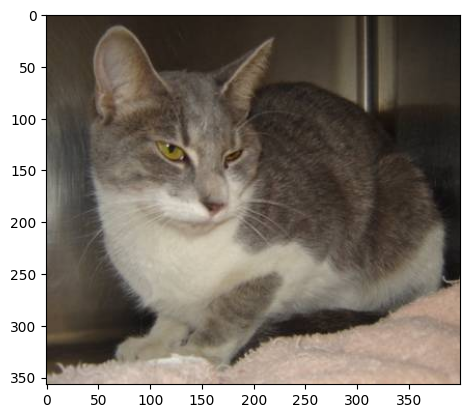

In [70]:
#DIsplay Cat Image

img = mpimg.imread('/content/train/cat.4352.jpg')
imgplot = plt.imshow(img)
plt.show()

In [71]:
file_names = os.listdir('/content/train')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

dog
cat
cat
dog
cat


In [72]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('No of dog images = ', dog_count)
print('No of cat images = ', cat_count)

No of dog images =  12500
No of cat images =  12500


Resizing all the images

In [77]:
#creating a directory for resized images

os.mkdir('/content/image resized')

FileExistsError: [Errno 17] File exists: '/content/image resized'

In [76]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

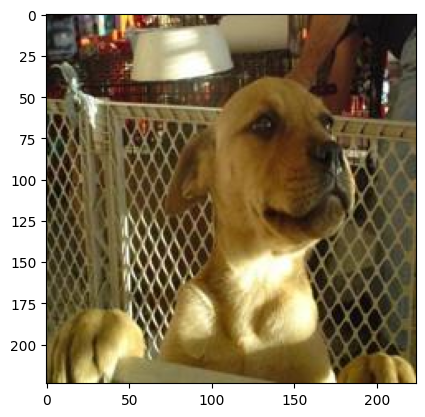

In [78]:
#DIsplay resized Dog Image

img = mpimg.imread('/content/image resized/dog.4405.jpg')
imgplot = plt.imshow(img)
plt.show()

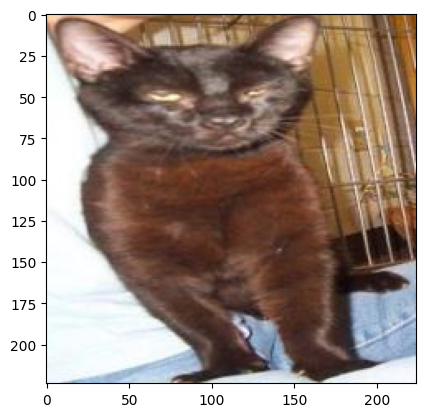

In [79]:
#DIsplay resized Cat Image

img = mpimg.imread('/content/image resized/cat.7098.jpg')
imgplot = plt.imshow(img)
plt.show()

Creating Labels for Resized images of Dogs and Cats

Cat --> 0


Dog --> 1

In [80]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [81]:
print(filenames[0:5])
print(len(filenames))

['dog.5348.jpg', 'cat.5225.jpg', 'cat.11179.jpg', 'dog.5625.jpg', 'cat.7098.jpg']
2000


In [82]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 1, 0]
2000


In [83]:
#counting the images of dogs and cats out of 2000 images

values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[ 962 1038]


Converting all the resized images to numpy arrays

In [84]:
import cv2
import glob

In [85]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [86]:
print(dog_cat_images)

[[[[ 11  20  53]
   [ 11  21  51]
   [ 11  21  51]
   ...
   [ 39  36  51]
   [ 34  32  44]
   [ 31  29  41]]

  [[ 11  20  53]
   [ 11  21  51]
   [ 11  22  50]
   ...
   [ 42  39  54]
   [ 41  39  51]
   [ 42  40  52]]

  [[  8  18  48]
   [  8  18  48]
   [  8  19  47]
   ...
   [ 41  38  53]
   [ 44  42  54]
   [ 46  44  56]]

  ...

  [[175 164 174]
   [171 160 170]
   [163 152 162]
   ...
   [ 46  45  79]
   [ 47  44  76]
   [ 46  43  75]]

  [[178 167 177]
   [178 167 177]
   [174 163 173]
   ...
   [ 53  49  84]
   [ 60  55  87]
   [ 62  57  89]]

  [[176 165 175]
   [179 168 178]
   [180 169 179]
   ...
   [ 57  51  86]
   [ 68  61  94]
   [ 73  66  99]]]


 [[[ 55  52  48]
   [ 50  47  43]
   [ 49  45  40]
   ...
   [ 53  95 138]
   [ 50  98 140]
   [ 53 103 145]]

  [[ 56  53  49]
   [ 51  48  44]
   [ 50  46  41]
   ...
   [ 53  96 139]
   [ 52 100 142]
   [ 55 107 148]]

  [[ 57  54  50]
   [ 53  50  46]
   [ 51  47  42]
   ...
   [ 50  98 140]
   [ 51 103 144]
   [ 55 109

In [87]:
type(dog_cat_images)

numpy.ndarray

In [88]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [89]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [90]:
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [91]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


Scaling the Data

In [92]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [93]:
print(X_train_scaled)

[[[[0.75294118 0.86666667 0.61960784]
   [0.77647059 0.88627451 0.65098039]
   [0.76862745 0.86666667 0.63921569]
   ...
   [0.92941176 0.88235294 0.86666667]
   [0.72941176 0.6627451  0.65098039]
   [0.5372549  0.4627451  0.44313725]]

  [[0.76862745 0.87843137 0.64313725]
   [0.79607843 0.90588235 0.6745098 ]
   [0.8        0.89411765 0.68235294]
   ...
   [0.77254902 0.71372549 0.70196078]
   [0.61568627 0.54117647 0.52941176]
   [0.56470588 0.49019608 0.47058824]]

  [[0.8        0.89411765 0.68235294]
   [0.83137255 0.9254902  0.71372549]
   [0.83921569 0.92156863 0.72941176]
   ...
   [0.62352941 0.55686275 0.54509804]
   [0.53333333 0.45098039 0.44313725]
   [0.56862745 0.49019608 0.47058824]]

  ...

  [[0.98431373 0.90980392 0.85882353]
   [0.98823529 0.91372549 0.8627451 ]
   [0.99215686 0.91764706 0.86666667]
   ...
   [0.08235294 0.07843137 0.08627451]
   [0.08627451 0.08235294 0.09019608]
   [0.08627451 0.08235294 0.09019608]]

  [[0.95686275 0.89411765 0.83137255]
   [0.9

Building the neural network

In [94]:
import tensorflow as tf
import tensorflow_hub as hub

In [95]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable = False)

In [96]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [97]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [98]:
model.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 100s 2s/step - loss: 0.2153 - acc: 0.9106
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0760 - acc: 0.9781
Epoch 3/5
50/50 [==============================] - 61s 1s/step - loss: 0.0564 - acc: 0.9831
Epoch 4/5
50/50 [==============================] - 62s 1s/step - loss: 0.0454 - acc: 0.9850
Epoch 5/5
50/50 [==============================] - 78s 2s/step - loss: 0.0360 - acc: 0.9900


In [99]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss = ', score)
print('Test Accuracy = ', acc)

13/13 [==============================] - 19s 1s/step - loss: 0.0463 - acc: 0.9825
Test Loss =  0.04628768563270569
Test Accuracy =  0.9825000166893005


Predictive System

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')